In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set_style('whitegrid')
sns.set_palette("husl")

%matplotlib inline

In [2]:
y9_2012 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2012.csv')
y9_2013 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2013.csv')
# useful
y9_2014 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2014.csv')
y9_2015 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2015.csv')
y9_2016 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2016.csv')
y9_2017 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2017.csv')

In [3]:
X_y7_2012 = pd.read_csv('X_y7_2012.csv')
X_y7_2013 = pd.read_csv('X_y7_2013.csv')
X_y7_2014 = pd.read_csv('X_y7_2014.csv')
X_y7_2015 = pd.read_csv('X_y7_2015.csv')
X_y7_2016 = pd.read_csv('X_y7_2016.csv')
X_y7_2017 = pd.read_csv('X_y7_2017.csv')

X_y9_2012 = pd.read_csv('X_y9_2012.csv')
X_y9_2013 = pd.read_csv('X_y9_2013.csv')
X_y9_2014 = pd.read_csv('X_y9_2014.csv')
X_y9_2015 = pd.read_csv('X_y9_2015.csv')
X_y9_2016 = pd.read_csv('X_y9_2016.csv')
X_y9_2017 = pd.read_csv('X_y9_2017.csv')

In [4]:
# verbes
X_y7_2012_v = pd.read_csv('X_y7_2012_verbes.csv')
X_y7_2013_v = pd.read_csv('X_y7_2013_verbes.csv')
X_y7_2014_v = pd.read_csv('X_y7_2014_verbes.csv')
X_y7_2015_v = pd.read_csv('X_y7_2015_verbes.csv')
X_y7_2016_v = pd.read_csv('X_y7_2016_verbes.csv')
X_y7_2017_v = pd.read_csv('X_y7_2017_verbes.csv')

X_y9_2012_v = pd.read_csv('X_y9_2012_verbes.csv')
X_y9_2013_v = pd.read_csv('X_y9_2013_verbes.csv')
X_y9_2014_v = pd.read_csv('X_y9_2014_verbes.csv')
X_y9_2015_v = pd.read_csv('X_y9_2015_verbes.csv')
X_y9_2016_v = pd.read_csv('X_y9_2016_verbes.csv')
X_y9_2017_v = pd.read_csv('X_y9_2017_verbes.csv')

In [5]:

yc2012 = y9_2012['Band Year 9: Numeracy'].dropna() >=8
yc2013 = y9_2013['Band Year 9: Numeracy'].dropna() >=8
yc2014 = y9_2014['Band Year 9: Numeracy'].dropna() >=8
yc2015 = y9_2015['Band Year 9: Numeracy'].dropna() >=8
yc2016 = y9_2016['Band Year 9: Numeracy'].dropna() >=8
yc2017 = y9_2017['Band Year 9: Numeracy'].dropna() >=8



yr2012 = y9_2012['Band Year 9: Numeracy'].dropna() 
yr2013 = y9_2013['Band Year 9: Numeracy'].dropna()
yr2014 = y9_2014['Band Year 9: Numeracy'].dropna()
yr2015 = y9_2015['Band Year 9: Numeracy'].dropna()
yr2016 = y9_2016['Band Year 9: Numeracy'].dropna()
yr2017 = y9_2017['Band Year 9: Numeracy'].dropna()
 

In [6]:
yc = pd.DataFrame(pd.concat([yc2012,yc2013,yc2014,
                             yc2015,yc2016,yc2017]))
yr = pd.DataFrame(pd.concat([yr2012,yr2013,yr2014,
                             yr2015,yr2016,yr2017]))

In [9]:
stage_list = [2]*10 +[3]*15 + [4]*18 + [5]*15
syllabus_dict = {'MA2-11MG':'Volume and Capacity', 'MA2-12MG':'Mass',
                 'MA2-13MG':'Time', 'MA2-14MG':'Three-Dimensional Space',
                 'MA2-15MG':'Two-Dimensional Space', 'MA2-17MG':'Position',
                 'MA2-4NA':'Whole Numbers', 'MA2-6NA':'Multiplication and Division',
                 'MA2-7NA':'Fractions and Decimals', 'MA2-8NA':'Patterns and Algebra',
                 'MA3-10MG':'Area', 'MA3-11MG':"Volume and Capacity",
                 'MA3-13MG':'Time', 'MA3-14MG':'Three-Dimensional Space',
                 'MA3-15MG':'Two-Dimensional Space', 'MA3-16MG':'Angles',
                 'MA3-17MG':'Position', 'MA3-18SP':'Data', 'MA3-19SP':'Chance',
                 'MA3-4NA':"Whole Numbers", 'MA3-5NA':'Addition and Subtraction',
                 'MA3-6NA':'Multiplication and Division','MA3-7NA':"Fractions and Decimals",
                 'MA3-8NA':"Patterns and Algebra",'MA3-9MG':"Length",
                 'MA4-10NA':'Equations','MA4-11NA':"Linear Relationships",
                 'MA4-12MG':'Length', 'MA4-13MG':'Area', 'MA4-14MG':'Volume',
                 'MA4-15MG':'Time', 'MA4-16MG':"Right-Angled Triangles",
                 'MA4-17MG':'Properties of Geometrical Figures','MA4-18MG':'Angle Relationships',
                 'MA4-19SP':'Data Collection and Representation','MA4-20SP':'Single Variable Data Analysis',
                 'MA4-21SP':'Probability','MA4-4NA':'Computation with Integers',
                 'MA4-5NA':'Fractions and Decimals','MA4-6NA':'Financial Mathematics',
                 'MA4-7NA':'Ratios and Rates','MA4-8NA':'Algebraic Techniques',
                 'MA4-9NA':'Indices','MA5.1-11MG':'Properties of Geometrical Figures',
                 'MA5.1-12SP':'Single Variable Data Analysis','MA5.1-13SP':"Probability",
                 'MA5.1-4NA':'Financial Mathematics','MA5.1-5NA':'Indices',
                 'MA5.1-6NA':'Linear Relationships','MA5.1-7NA':'Non-Linear Relationships',
                 'MA5.1-8MG':'Area and Surface Area','MA5.1-9MG':'Numbers of Any Magnitude',
                 'MA5.2-17SP':'Probability','MA5.2-5NA':'Ratios and Rates',
                 'MA5.2-6NA':'Algebraic Techniques','MA5.2-8NA':'Equations',
                 'MA5.3-13MG':'Area and Surface Area','MA5.3-4NA':'Ratios and Rates'
    
}

# merge with the interrelated components

remove the stage, merge with the interrelated components

In [42]:
y9_df2 = pd.concat([X_y9_2012,X_y9_2013,X_y9_2014,
                 X_y9_2015,X_y9_2016,X_y9_2017]).set_index('SRN')

In [43]:
# create new columns
new_columns = [syllabus_dict.get(i,0) for i in list(y9_df2.columns) ]

In [44]:
y9_df2.columns = new_columns
y9_df3 = y9_df2.T.reset_index().groupby(['index']).apply(np.mean).T

In [45]:
y9_df4 = y9_df3.T.fillna(y9_df3.T.mean()).T

In [46]:
y9_df4.head()

index,Addition and Subtraction,Algebraic Techniques,Angle Relationships,Angles,Area,Area and Surface Area,Chance,Computation with Integers,Data,Data Collection and Representation,...,Properties of Geometrical Figures,Ratios and Rates,Right-Angled Triangles,Single Variable Data Analysis,Three-Dimensional Space,Time,Two-Dimensional Space,Volume,Volume and Capacity,Whole Numbers
SRN,,,,,,,,,,,,,,,,,,,,,
428415078,0.671368,0.833333,0.0,0.671368,0.0,1.0,0.666667,1.0,1.0,1.0,...,0.00,1.0,0.671368,1.0,0.583333,0.666667,1.0,0.671368,0.671368,0.671368
428778791,0.765705,0.833333,0.0,0.765705,1.0,1.0,0.666667,1.0,1.0,1.0,...,0.50,1.0,0.765705,1.0,0.583333,0.666667,1.0,0.765705,0.765705,0.765705
433786998,0.328846,0.000000,0.0,0.328846,1.0,0.0,0.000000,1.0,1.0,0.0,...,0.00,1.0,0.328846,0.0,0.416667,0.000000,0.0,0.328846,0.328846,0.328846
433787021,0.857051,1.000000,1.0,0.857051,1.0,1.0,0.666667,1.0,1.0,1.0,...,0.25,1.0,0.857051,0.0,1.000000,0.833333,1.0,0.857051,0.857051,0.857051
433787048,0.789209,0.833333,1.0,0.789209,1.0,0.0,1.000000,1.0,1.0,1.0,...,0.50,1.0,0.789209,1.0,0.833333,0.416667,1.0,0.789209,0.789209,0.789209


In [47]:
# train test split
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(y9_df4,yc,
                                                 random_state = 233)

## Logistic regression

In [48]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train2, y_train2)
y_pred = lr.predict(X_test2)
print lr.score(X_test2, y_test2)


0.957928802589


In [49]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, y_pred)

array([[ 32,   9],
       [  4, 264]])

In [52]:
s_1 = pd.DataFrame({
    'strength': lr.coef_[0,:],
    'question': X_train2.columns
}).sort_values('strength', ascending = False)

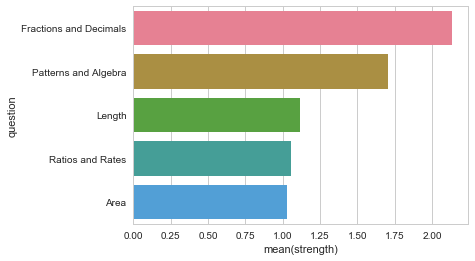

In [54]:
sns.barplot(x = 'strength',y = 'question',data = s_1[:5])

**merge again**

In [29]:
y9_df5 = pd.concat([X_y9_2012,X_y9_2013,X_y9_2014,
                 X_y9_2015,X_y9_2016,X_y9_2017]).set_index('SRN')

In [30]:
column_name = pd.Series(y9_df5.columns)
column_name = column_name.str.replace('MA2-','')
column_name = column_name.str.replace('MA3-','')
column_name = column_name.str.replace('MA4-','')
column_name = column_name.str.replace('MA5.1-','')
column_name = column_name.str.replace('MA5.2-','')
column_name = column_name.str.replace('MA5.3-','')

# only take the last 2 digits
# NA: Number and Algebra, MG: Measurement and Geometry, SP: Statistics and Probability
new_col = column_name.str.extract('\d+(.*)', expand=False)
new_col = new_col.str.replace('NA','Number and Algebra')
new_col = new_col.str.replace('MG','Measurement and Geometry')
new_col = new_col.str.replace('SP','Statistics and Probability')

y9_df5.columns = new_col

y9_df5 = y9_df5.T.reset_index().groupby(['index']).apply(np.mean).T

In [31]:
y9_df5.head()

index,Measurement and Geometry,Number and Algebra,Statistics and Probability
SRN,,,
428415078,0.461538,0.803419,0.916667
428778791,0.692308,0.729604,0.916667
433786998,0.256410,0.364413,0.250000
433787021,0.878205,0.962704,0.666667
433787048,0.615385,0.837607,1.000000


In [32]:
np.mean(y9_df5)

index
Measurement and Geometry      0.615717
Number and Algebra            0.685340
Statistics and Probability    0.754548
dtype: float64

In [33]:
# train test split
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(y9_df5,yc,
                                                 random_state = 233)

## Logistic regression

In [34]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train3, y_train3)
y_pred = lr.predict(X_test3)
print lr.score(X_test3, y_test3)


0.94498381877


In [35]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test3, y_pred)

array([[ 26,  15],
       [  2, 266]])

In [39]:
s_2 = pd.DataFrame({
    'strength': lr.coef_[0,:],
    'question': X_train3.columns
}).sort_values('strength', ascending = False)

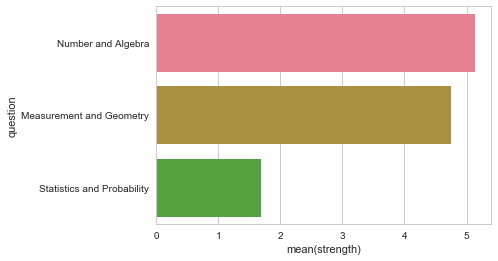

In [41]:
sns.barplot(x = 'strength',y = 'question',data = s_2)

## ** Verbs**

In [20]:
df_v_y9 = pd.concat([X_y9_2012_v,X_y9_2013_v,X_y9_2014_v,X_y9_2015_v,
                     X_y9_2016_v,X_y9_2017_v]).set_index('SRN')

In [22]:
df_v_y9 = df_v_y9.T.fillna(df_v_y9.T.mean()).T

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4 = train_test_split(df_v_y9,yc,
                                                    random_state = 233)

## Logistic Regression

In [28]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train4, y_train4)
y_pred = lr.predict(X_test4)
print lr.score(X_test4, y_test4)


0.970873786408


In [25]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test4, y_pred)

array([[ 33,   8],
       [  1, 267]])

In [26]:
strength_df = pd.DataFrame({
    'strength': lr.coef_[0,:],
    'question': X_train4.columns
}).sort_values('strength', ascending = False)

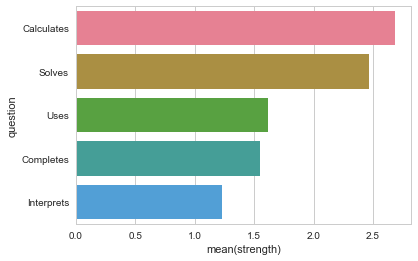

In [27]:
sns.barplot(x = 'strength',y = 'question',data = strength_df.iloc[0:5])